In [1]:
import numpy as np 
import pandas as pd 

from subprocess import check_output
#input_file = "../dataset_/movie_metadata.csv"
input_file = "../dataset_/no_imdb_names-count_cat-tf_184f.csv"

In [2]:
# Importing packages

import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline

In [3]:
f = pd.read_csv(input_file)
data=DataFrame(f)

# Ignore 'gross' equals to 0
data['worldwide_gross'].replace(0,np.nan,inplace=True)

# Ignore na data? Imputation methods?
data = data.dropna()
data = data.drop('Unnamed: 0',1)

data.describe()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,blockbuster_month,cast_total_facebook_likes,director_facebook_likes,dump_month,duration,production_budget,title_year,...,raiting_notrated,raiting_passed,raiting_pg,raiting_pg13,raiting_r,raiting_tv14,raiting_tvg,raiting_tvma,raiting_tvpg,raiting_unrated
count,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4.435000e+03,4435.000000,...,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.0,4435.0,4435.000000,4435.000000
mean,7157.491319,1809.685231,687.895152,0.362570,10567.263134,777.843517,0.220519,108.698985,3.295081e+07,2002.328749,...,0.008863,0.000902,0.073883,0.158428,0.221608,0.000113,0.0,0.0,0.000113,0.005571
std,15729.577953,4221.614839,1714.914090,0.480796,18891.863351,3008.650726,0.414643,20.701637,4.077419e+07,12.418491,...,0.066291,0.021219,0.177717,0.233145,0.249355,0.007508,0.0,0.0,0.007508,0.052802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.100000e+03,1920.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,676.500000,333.500000,167.000000,0.000000,1665.000000,9.000000,0.000000,95.000000,6.500000e+06,1999.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,1000.000000,643.000000,402.000000,0.000000,3509.000000,58.000000,0.000000,105.000000,2.000000e+07,2005.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
75%,12000.000000,960.000000,662.000000,1.000000,15278.500000,222.000000,0.000000,119.000000,4.200000e+07,2010.000000,...,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.0,0.0,0.000000,0.000000
max,713000.000000,137000.000000,23000.000000,1.000000,729779.000000,33000.000000,1.000000,227.000000,4.250000e+08,2017.000000,...,0.577350,0.500000,0.707107,0.707107,0.707107,0.500000,0.0,0.0,0.500000,0.707107


In [4]:
data.head(10)

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,blockbuster_month,cast_total_facebook_likes,director_facebook_likes,dump_month,duration,production_budget,title_year,...,raiting_notrated,raiting_passed,raiting_pg,raiting_pg13,raiting_r,raiting_tv14,raiting_tvg,raiting_tvma,raiting_tvpg,raiting_unrated
0,1000,942.0,862,1,4859,7000,0,178,425000000,2009.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
1,29000,14000.0,787,1,45239,7000,0,194,200000000,1997.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,3000,3000.0,878,1,8694,367,0,124,215000000,2015.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
3,26000,23000.0,14000,0,79155,0,0,140,190000000,2015.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,26000,21000.0,19000,0,97000,0,0,141,250000000,2015.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
5,10000,577.0,175,1,11064,0,0,130,125000000,2011.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
6,1000,525.0,490,0,2601,69,0,102,150000000,2013.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,21000,3000.0,1000,0,25774,0,0,195,200000000,2013.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
8,7000,4000.0,1000,1,13636,22,0,91,74000000,2015.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,21000,19000.0,11000,0,66820,96,0,147,250000000,2016.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:

[c for c in data.columns]

['actor_1_facebook_likes',
 'actor_2_facebook_likes',
 'actor_3_facebook_likes',
 'blockbuster_month',
 'cast_total_facebook_likes',
 'director_facebook_likes',
 'dump_month',
 'duration',
 'production_budget',
 'title_year',
 'worldwide_gross',
 'adamsandler',
 'adamscott',
 'alpacino',
 'angelinajolie',
 'annakendrick',
 'annehathaway',
 'anthonyhopkins',
 'anthonymackie',
 'antonyelchin',
 'billcobbs',
 'billmurray',
 'bobhoskins',
 'bradleycooper',
 'bradpitt',
 'briandepalma',
 'brucegreenwood',
 'brucemcgill',
 'brucewillis',
 'catherineohara',
 'channingtatum',
 'charlesdance',
 'chazzpalminteri',
 'cheechmarin',
 'chlo',
 'chrisevans',
 'christianbale',
 'cliftoncollinsjr',
 'clinteastwood',
 'colinfirth',
 'dennisquaid',
 'denzelwashington',
 'dianekeaton',
 'djimonhounsou',
 'doncheadle',
 'dwaynejohnson',
 'emmastone',
 'franklangella',
 'garyoldman',
 'gerardbutler',
 'gracemoretz',
 'harrisonford',
 'helenmirren',
 'hughjackman',
 'jadapinkettsmith',
 'jakegyllenhaal',
 'j

In [6]:
data_input = data.drop('worldwide_gross',1)
data_target = data['worldwide_gross']

In [7]:
from sklearn.feature_selection import VarianceThreshold
#X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
#sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
subset = sel.fit_transform(data_input)

subset.shape

# CONCLUSIONS: this method discards features with low variance. 
# Thus, all the binary variables are discarded

(4435, 10)

In [8]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [9]:
np.var(data_input)

from sklearn.preprocessing import StandardScaler

# Variation of a feature, depends on the nature of the feature
# Should the features be scaled before applying VarianceThreshold?
# StandardScaler returns features with mean 0 and std=1. So, no?

In [10]:
### SELECT K-BEST
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

kbSel = SelectKBest(chi2, k=11).fit(data_input, data_target)
kbSel.get_support(indices=True)

data.columns[kbSel.get_support(indices=True)]


Index(['actor_1_facebook_likes', 'actor_2_facebook_likes',
       'actor_3_facebook_likes', 'cast_total_facebook_likes',
       'director_facebook_likes', 'duration', 'production_budget', 'chlo',
       'cliftoncollinsjr', 'stevenspielberg', 'willsmith'],
      dtype='object')

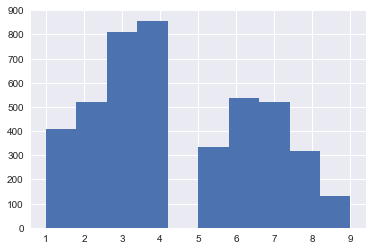

In [11]:
# CHANGE THE FOCUS, FROM REGRESSION TO CLASSIFICATION

# DISCRETIZE THE TARGET VARIABLE
def label_gross_9 (gross):
    if (gross < 500000) : return 1
    elif ((gross >= 500000) & (gross < 5000000)) : return 2
    elif ((gross >= 5000000) & (gross < 20000000)) : return 3
    elif ((gross >= 20000000) & (gross < 50000000)) : return 4
    elif ((gross >= 50000000) & (gross < 70000000)) : return 5
    elif ((gross >= 70000000) & (gross < 125000000)) : return 6
    elif ((gross >= 125000000) & (gross < 250000000)) : return 7
    elif ((gross >= 250000000) & (gross < 550000000)) : return 8
    elif (gross >= 550000000) : return 9

data_target2 = data_target.apply(lambda gross: label_gross_9 (gross))
data_target2.hist()

In [12]:
# THIS TAKES A LOT OF TIME

from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
etr = ExtraTreesRegressor()

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFE(estimator=etr, n_features_to_select=15)
rfecv.fit(data_input.ix[:, 0:120], data_target2)
#print("Optimal number of features : %d" % rfecv.n_features_)

#Ranking:


RFE(estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False),
  n_features_to_select=15, step=1, verbose=0)

Feature ranking:
1. feature 8:production_budget   (0.122616)
2. feature 7:duration   (0.083361)
3. feature 9:title_year   (0.082511)
4. feature 2:actor_3_facebook_likes   (0.080081)
5. feature 4:cast_total_facebook_likes   (0.079716)
6. feature 1:actor_2_facebook_likes   (0.078327)
7. feature 5:director_facebook_likes   (0.077303)
8. feature 0:actor_1_facebook_likes   (0.071810)
9. feature 6:dump_month   (0.014808)
10. feature 3:blockbuster_month   (0.013144)
11. feature 156:country_usa   (0.011825)
12. feature 177:raiting_r   (0.008957)
13. feature 176:raiting_pg13   (0.008459)
14. feature 136:color_color   (0.008109)
15. feature 155:country_uk   (0.007910)
16. feature 175:raiting_pg   (0.006944)
17. feature 159:language_english   (0.006711)
18. feature 135:color_blackandwhite   (0.004720)
19. feature 142:country_france   (0.003756)
20. feature 173:raiting_notrated   (0.003672)
21. feature 143:country_germany   (0.003377)
22. feature 170:raiting_g   (0.003181)
23. feature 138:country_

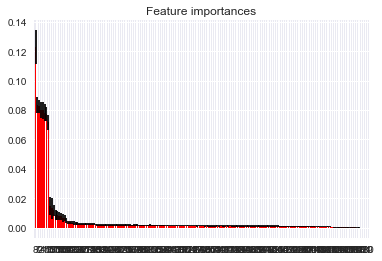

In [13]:
# Feature importances with forests of trees
X = data_input
y = data_target2

from sklearn.ensemble import ExtraTreesClassifier
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(data_input.shape[1]):
    print("%d. feature %d:%s   (%f)" % (f + 1, indices[f], 
                                        data_input.columns[indices[f]],
                                        importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()